In [1]:
# разбейте исходную таблицу на 2: по полу пассажиров
# удалите пустые строки или заполните их соответствующими символами
# Построить гистограмму распределения пассажиров по возрасту
# Вычислите мин и макс, среднее, моду, медиану возраста пассажира каждого пола
# визуализировать возраст при помощи различных настроек метода plot


In [4]:
import pandas as pd

# Загрузка данных из набора Titanic
titanic_data = pd.read_csv("titanic.csv")

# Удаление строк с пропущенными значениями
clean_data = titanic_data.dropna()

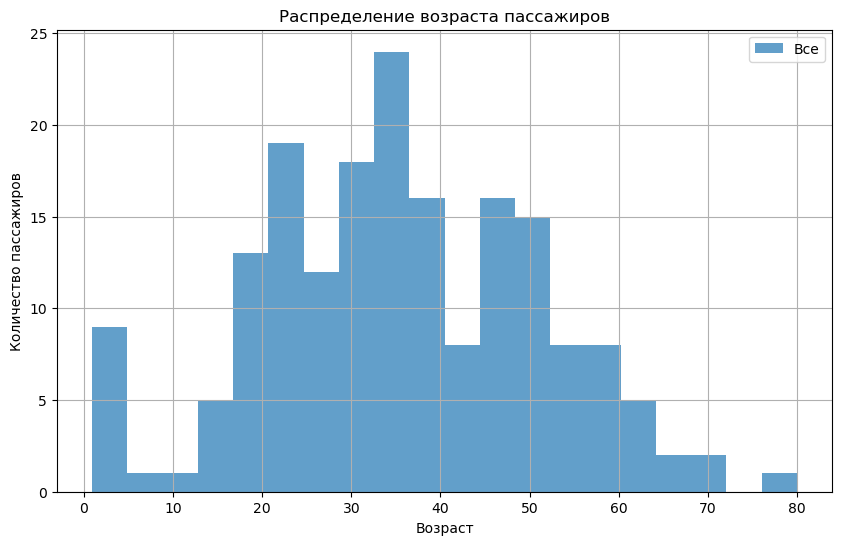

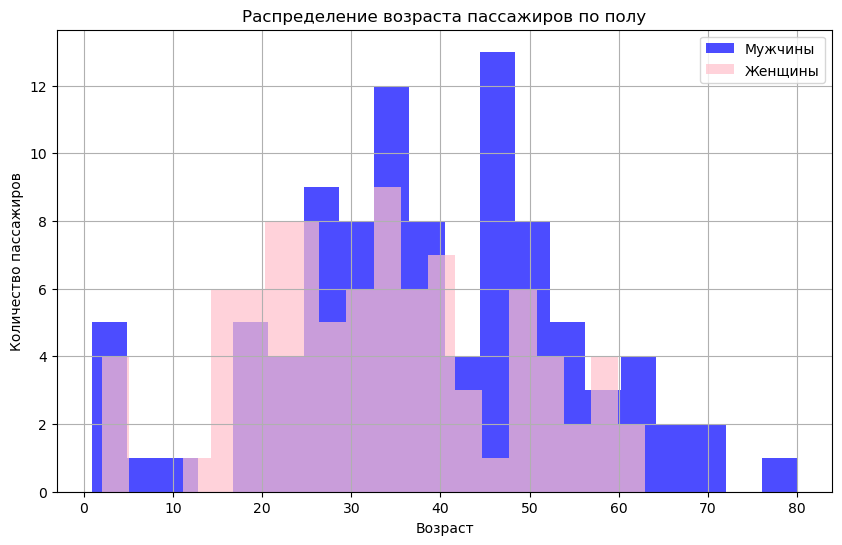

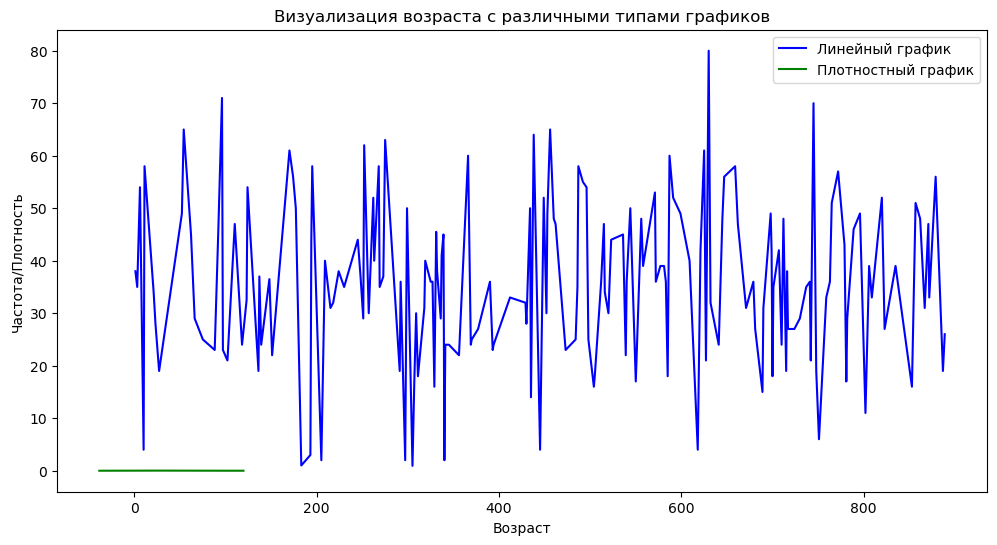

In [5]:
import matplotlib.pyplot as plt

# Создание гистограммы распределения возрастов пассажиров
plt.figure(figsize=(10, 6))
clean_data['Age'].hist(bins=20, alpha=0.7, label='Все')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.title('Распределение возраста пассажиров')
plt.legend()
plt.show()

# Создание отдельных гистограмм для мужчин и женщин
male_passengers = clean_data[clean_data['Sex'] == 'male']
female_passengers = clean_data[clean_data['Sex'] == 'female']

plt.figure(figsize=(10, 6))
male_passengers['Age'].hist(bins=20, alpha=0.7, label='Мужчины', color='blue')
female_passengers['Age'].hist(bins=20, alpha=0.7, label='Женщины', color='pink')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.title('Распределение возраста пассажиров по полу')
plt.legend()
plt.show()


In [6]:
# Разделение данных по полу
male_passengers = clean_data[clean_data['Sex'] == 'male']
female_passengers = clean_data[clean_data['Sex'] == 'female']

# Функция для вычисления статистических показателей
def calculate_statistics(df, gender):
    min_age = df['Age'].min()
    max_age = df['Age'].max()
    mean_age = df['Age'].mean()
    median_age = df['Age'].median()
    mode_age = df['Age'].mode()[0]  # Берем первую моду, если их несколько

    return {
        'Пол': gender,
        'Минимальный возраст': min_age,
        'Максимальный возраст': max_age,
        'Средний возраст': mean_age,
        'Медиана возраста': median_age,
        'Мода возраста': mode_age
    }

# Вычисление статистики для мужчин и женщин
male_stats = calculate_statistics(male_passengers, 'Мужчины')
female_stats = calculate_statistics(female_passengers, 'Женщины')

# Объединение результатов в один DataFrame
statistics_df = pd.DataFrame([male_stats, female_stats])

# Вывод результатов
print(statistics_df)

       Пол  Минимальный возраст  Максимальный возраст  Средний возраст  \
0  Мужчины                 0.92                  80.0        38.451789   
1  Женщины                 2.00                  63.0        32.676136   

   Медиана возраста  Мода возраста  
0             37.00           36.0  
1             32.25           24.0  


E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


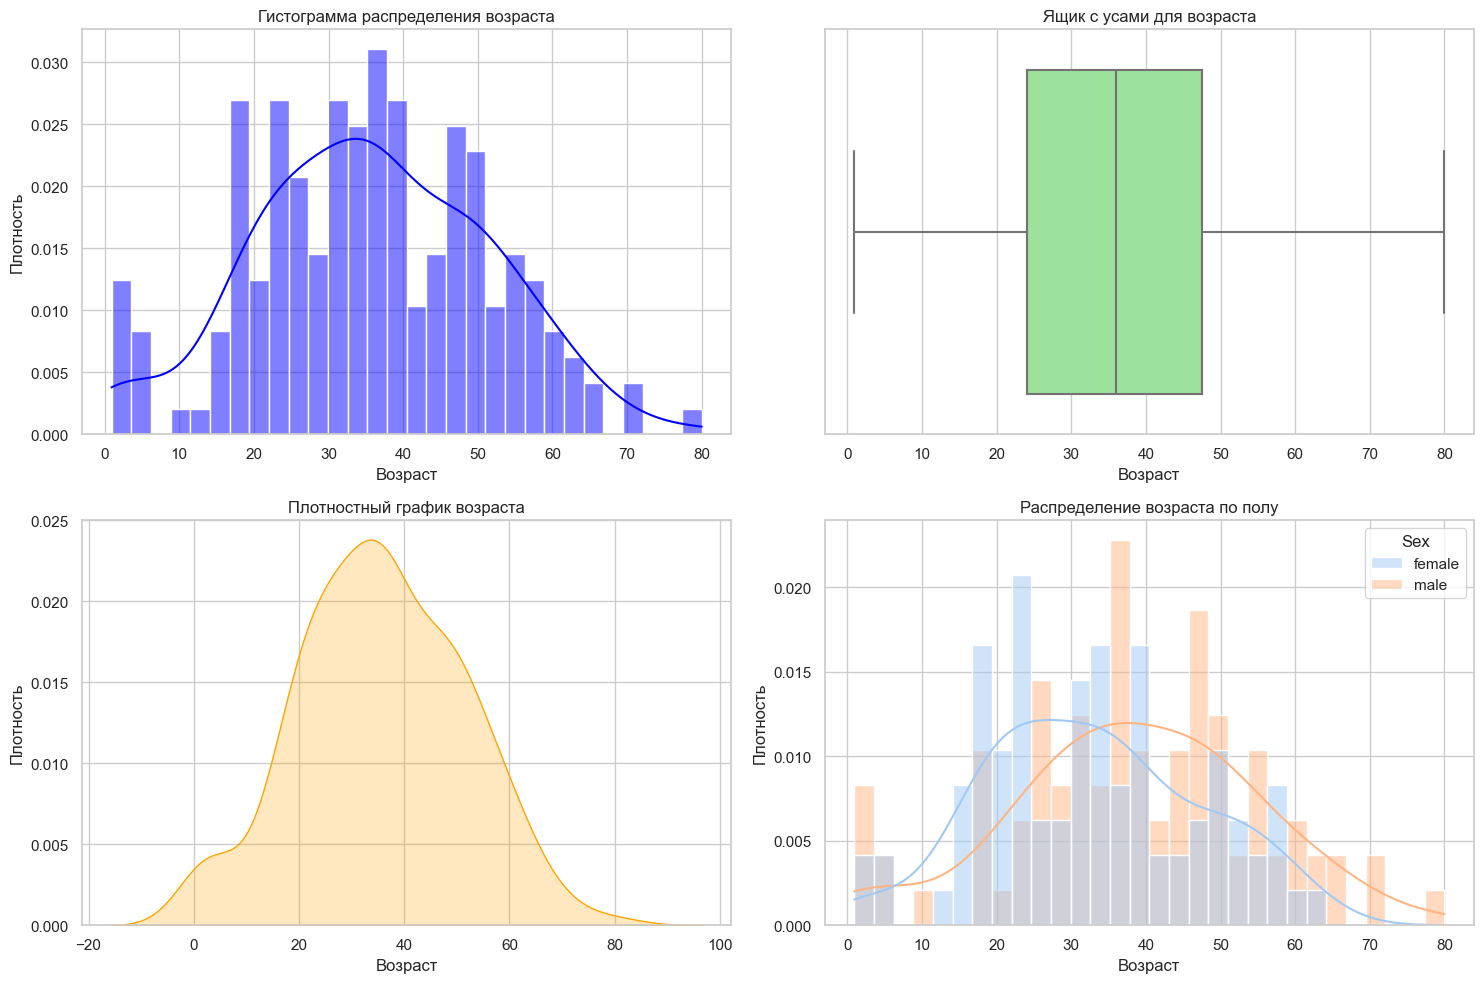

In [8]:
import seaborn as sns

# Настройка стиля графиков
sns.set(style="whitegrid")

# Создание фигуры для нескольких графиков
plt.figure(figsize=(15, 10))

# 1. Гистограмма распределения возраста
plt.subplot(2, 2, 1)
sns.histplot(clean_data['Age'], bins=30, kde=True, color='blue', stat='density')
plt.title('Гистограмма распределения возраста')
plt.xlabel('Возраст')
plt.ylabel('Плотность')

# 2. Ящик  (Box Plot)
plt.subplot(2, 2, 2)
sns.boxplot(x='Age', data=clean_data, color='lightgreen')
plt.title('Ящик для возраста')
plt.xlabel('Возраст')

# 3. Плотностный график (Density Plot)
plt.subplot(2, 2, 3)
sns.kdeplot(clean_data['Age'], color='orange', fill=True)
plt.title('Плотностный график возраста')
plt.xlabel('Возраст')
plt.ylabel('Плотность')

# 4. Гистограмма распределения возраста по полу
plt.subplot(2, 2, 4)
sns.histplot(data=clean_data, x='Age', hue='Sex', bins=30, kde=True, stat='density', palette='pastel')
plt.title('Распределение возраста по полу')
plt.xlabel('Возраст')
plt.ylabel('Плотность')

# Отображение графиков
plt.tight_layout()
plt.show()